<a href="https://colab.research.google.com/github/holdenkim/YG/blob/main/YG_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3주차 실기 유형 1 첫번째

In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv')

 Vehicle_Age 값이 2년이상인 사람들 중 Annual_Premium 값이 해당 그룹의 중간값 이상인 사람들을 찾고, 그들의 Vintage값의 평균을 구하여라

In [43]:
data.value_counts()

id      Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
381108  Female  68   1                14.0         0                   > 2 Years    Yes             44617.0         124.0                 74       0           1
127057  Male    25   1                26.0         0                   < 1 Year     Yes             26299.0         160.0                 298      0           1
127061  Male    25   1                5.0          1                   < 1 Year     No              50212.0         152.0                 78       0           1
127064  Female  24   1                29.0         1                   < 1 Year     No              38992.0         152.0                 237      0           1
127065  Female  29   1                30.0         1                   < 1 Year     No              30747.0         152.0                 237      0           1
                                       

In [44]:
data[(data.Vehicle_Age == ('> 2 Years')) & (data.Annual_Premium > data.Annual_Premium.median())]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11,39234,Male,65,1,28.0,0,> 2 Years,Yes,41403.0,122.0,254,0
55,219321,Female,74,1,28.0,0,> 2 Years,Yes,51430.0,26.0,197,0
71,48023,Female,48,1,28.0,0,> 2 Years,Yes,66444.0,26.0,36,0
72,13025,Male,47,1,28.0,0,> 2 Years,Yes,47506.0,124.0,148,1
144,91149,Male,46,1,8.0,0,> 2 Years,Yes,34768.0,26.0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304789,105172,Male,68,1,28.0,0,> 2 Years,Yes,56124.0,26.0,18,0
304811,15285,Male,44,1,28.0,0,> 2 Years,Yes,45614.0,26.0,238,0
304815,64939,Male,59,1,28.0,0,> 2 Years,Yes,49092.0,26.0,80,1
304818,133703,Male,57,1,41.0,0,> 2 Years,Yes,37758.0,124.0,292,0


In [45]:
data[(data.Vehicle_Age == ('> 2 Years')) & (data.Annual_Premium > data.Annual_Premium.median())].Vintage.mean()

154.43647182359118

vehicle_age에 따른 각 성별(gender)그룹의 Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라


In [46]:
data_AP = data.groupby(['Vehicle_Age','Gender'], as_index=False)['Annual_Premium'].mean()

In [47]:
data_AP

,Vehicle_Age,Gender,Annual_Premium
0,1-2 Year,Female,30762.245001
1,1-2 Year,Male,30413.088469
2,< 1 Year,Female,29972.286702
3,< 1 Year,Male,30310.982212
4,> 2 Years,Female,36108.366374
5,> 2 Years,Male,35303.870627


In [48]:
pivot = data_AP.pivot(index='Vehicle_Age', columns='Gender')

In [49]:
pivot

Annual_Premium              
Gender              Female          Male
Vehicle_Age                             
1-2 Year      30762.245001  30413.088469
< 1 Year      29972.286702  30310.982212
> 2 Years     36108.366374  35303.870627

#3주차 실기 유형1 두번째

In [51]:
data = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv')

In [52]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


price_range로 그룹핑 하여 각 그룹의 n_core 빈도가 가장 높은 value와 그 빈도수를 구하여라

In [53]:
data.groupby('price_range')['n_cores'].sum().sort_values(ascending=False)

price_range
2    2341
0    2300
3    2251
1    2149
Name: n_cores, dtype: int64

In [54]:
data.groupby('price_range', as_index=False)['n_cores'].sum().sort_values('n_cores', ascending=False).iloc[0,:]

price_range       2
n_cores        2341
Name: 2, dtype: int64

price_range 3인 그룹에서 상관관계가 2번째로 높은 두 컬럼과 상관 계수를 구하라

In [55]:
data[(data['price_range']==3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,4,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,17,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3


In [56]:
data[(data['price_range']==3)].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.019588,-0.047833,-0.134352,0.083515,0.014355,-0.041099,0.033896,-0.002937,-0.066908,0.025482,-0.082547,-0.065939,-0.262759,-0.080752,-0.009713,0.086021,-0.020736,-0.033993,0.001345,NaN
blue,-0.019588,1.000000,0.074535,0.061992,0.031587,0.044653,-0.003080,-0.016718,-0.030398,-0.045381,0.024459,0.043505,-0.066695,0.010000,0.001807,0.065277,-0.072417,-0.032623,0.060329,0.010291,NaN
clock_speed,-0.047833,0.074535,1.000000,-0.042840,0.095757,-0.144051,-0.008301,-0.075859,0.036738,-0.052820,0.052912,0.046343,-0.011819,0.041331,0.047115,0.039579,-0.055842,-0.127549,0.010260,0.005814,NaN
dual_sim,-0.134352,0.061992,-0.042840,1.000000,-0.075681,-0.014096,-0.036384,-0.056753,-0.050991,-0.078633,-0.051248,-0.074033,-0.011231,0.094004,-0.067544,-0.041602,-0.078093,-0.076653,0.012503,-0.014924,NaN
fc,0.083515,0.031587,0.095757,-0.075681,1.000000,-0.053781,-0.039115,-0.042970,0.064398,-0.047587,0.635166,0.044692,-0.025624,-0.050382,0.016927,0.024985,-0.029785,-0.031470,0.067129,0.010370,NaN
four_g,0.014355,0.044653,-0.144051,-0.014096,-0.053781,1.000000,-0.000090,0.098571,0.038960,0.061228,-0.059680,-0.024102,0.002240,-0.006090,0.007722,0.059551,-0.056890,0.604218,0.069149,0.015294,NaN
int_memory,-0.041099,-0.003080,-0.008301,-0.036384,-0.039115,-0.000090,1.000000,0.011611,-0.057593,-0.033523,-0.046525,-0.008610,0.035620,-0.048515,0.070163,0.005320,-0.020160,-0.016917,0.060954,0.025998,NaN
m_dep,0.033896,-0.016718,-0.075859,-0.056753,-0.042970,0.098571,0.011611,1.000000,0.015905,0.005673,0.024424,-0.035808,-0.042339,-0.017574,-0.036196,-0.077183,0.037715,0.081976,0.037092,0.001044,NaN
mobile_wt,-0.002937,-0.030398,0.036738,-0.050991,0.064398,0.038960,-0.057593,0.015905,1.000000,-0.041840,0.046314,-0.003764,-0.004345,0.107730,0.010026,-0.013806,-0.013653,0.034039,0.010625,0.055018,NaN
n_cores,-0.066908,-0.045381,-0.052820,-0.078633,-0.047587,0.061228,-0.033523,0.005673,-0.041840,1.000000,-0.002674,0.038382,0.124608,-0.036159,-0.032997,-0.011491,0.029556,0.013938,0.000879,0.006066,NaN


In [57]:
data[(data['price_range']==3)].corr().unstack()

battery_power  battery_power    1.000000
               blue            -0.019588
               clock_speed     -0.047833
               dual_sim        -0.134352
               fc               0.083515
                                  ...   
price_range    talk_time             NaN
               three_g               NaN
               touch_screen          NaN
               wifi                  NaN
               price_range           NaN
Length: 441, dtype: float64

In [58]:
df = pd.DataFrame(data = data[(data['price_range']==3)].corr().unstack(), columns=['a']).sort_values('a', ascending=False)

In [62]:
df.head(30)

,,a
battery_power,battery_power,1.000000
pc,pc,1.000000
dual_sim,dual_sim,1.000000
fc,fc,1.000000
four_g,four_g,1.000000
int_memory,int_memory,1.000000
m_dep,m_dep,1.000000
mobile_wt,mobile_wt,1.000000
n_cores,n_cores,1.000000
px_height,px_height,1.000000


In [63]:
df_remove_one =df[ df['a'] != 1.0]

In [64]:
df_remove_one.head(1)

,,a
fc,pc,0.635166


#3주차 실기 유형 2 첫번째

In [65]:
Train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/train.csv')
Test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/test.csv')

In [66]:
Train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
1,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
2,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


In [67]:
X = Train[Train.columns[0:13]]
y = Train[['target']]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier(random_state=42)

In [71]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_s_train = f1_score(y_train, pred_train)

In [75]:
f1_s_test = f1_score(y_test, pred_test)

In [77]:
print(f1_s_train)
print(f1_s_test)

1.0
0.8955223880597014


In [78]:
Test.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,62,0,0,124,209,0,1,163,0,0.0,2,0,2
1,54,1,2,120,258,0,0,147,0,0.4,1,0,3


In [79]:
submission =pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/submission.csv")

In [80]:
preprocessing_test_df  = Test
test_pred = model.predict(preprocessing_test_df)
submission['0'] = test_pred
submission.to_csv('submission_model.csv',index=False)

In [82]:
submission.head(5)

,0
0,1
1,1
2,0
3,0
4,0


#3주차 실기 유형 2 두번째

핸드폰 가격예측 (price_range컬럼 0(저렴) ~3(매우비쌈) 범위 ) accuarcy로 평가

In [83]:
train_url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv'

test_url ='https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/test.csv'

In [84]:
data = pd.read_csv(train_url)

In [85]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


In [86]:
X = data [ data.columns[0:20]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1cb9f250>,
      dtype=object)

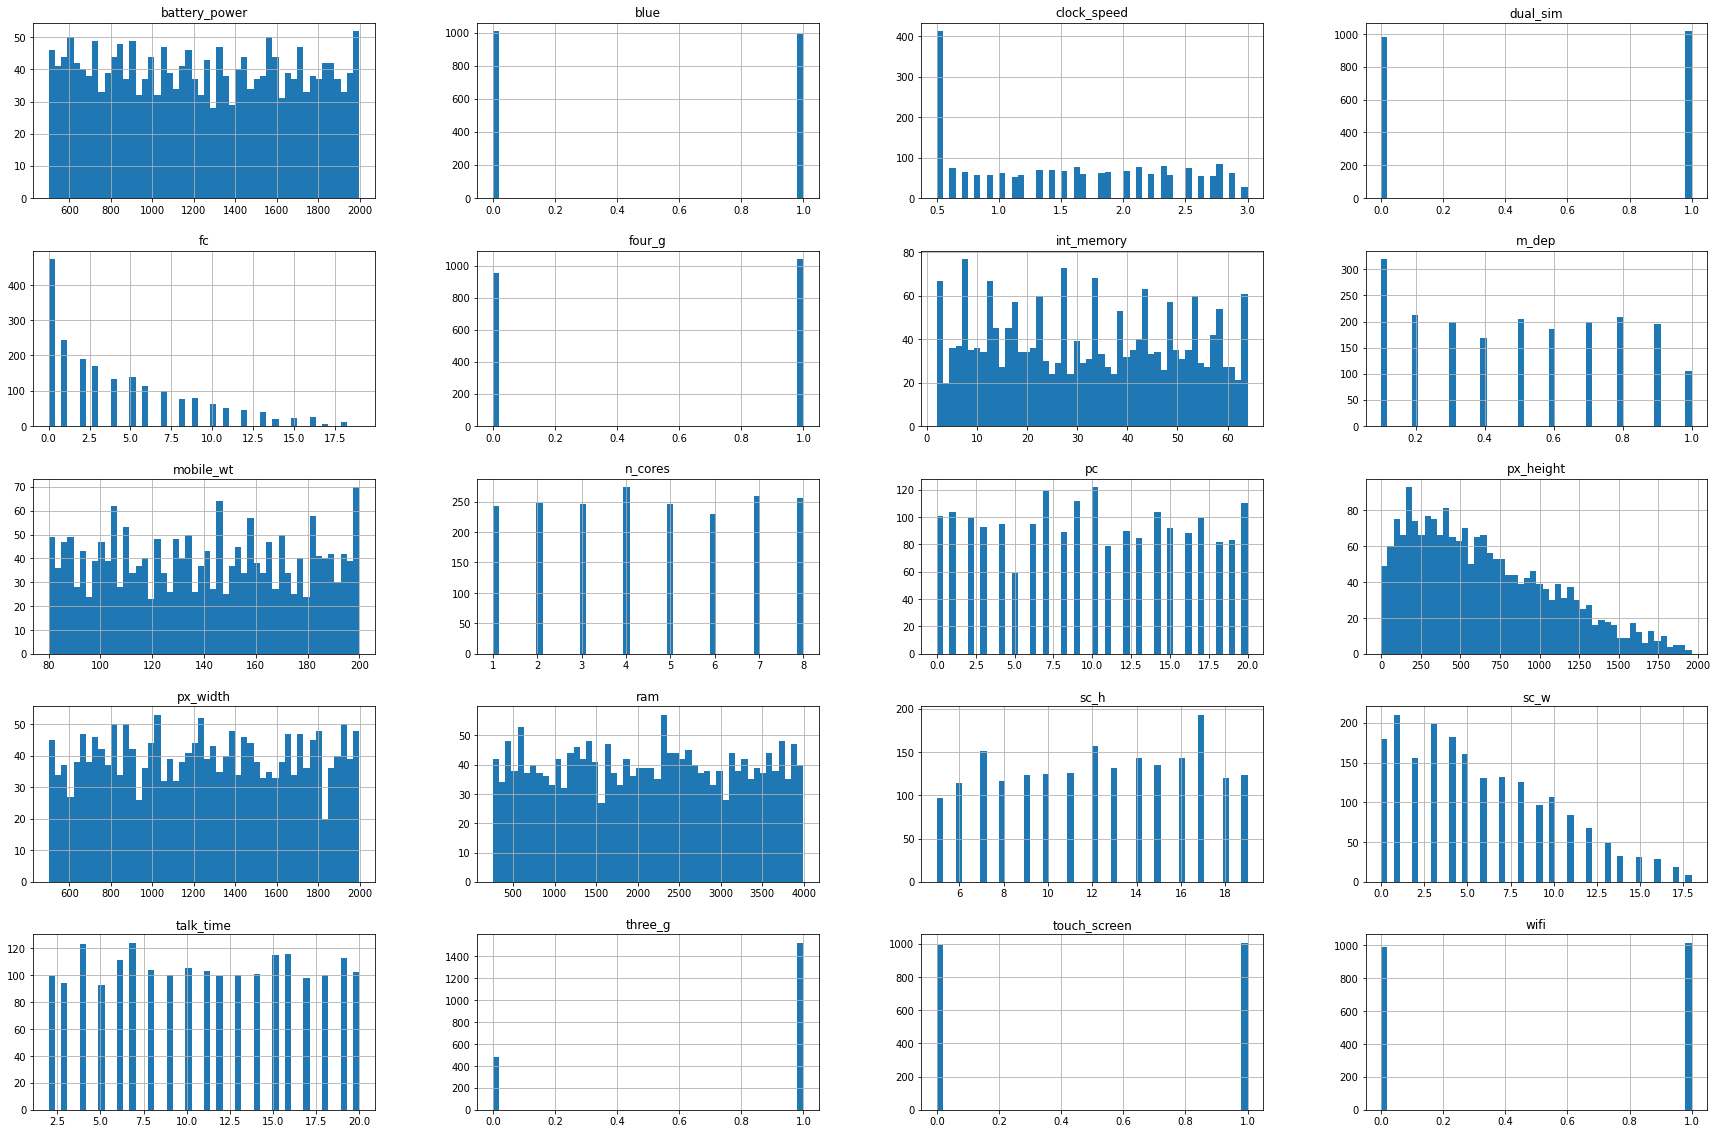

In [102]:
X.hist(bins=50,figsize=(30,20))

In [87]:
X.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [88]:
y = data[['price_range']]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model = RandomForestClassifier(random_state=42)

In [94]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [95]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [99]:
pred_train[0:5]

array([2, 3, 1, 2, 1])

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
score_train = accuracy_score(y_train, pred_train)
score_test = accuracy_score(y_test, pred_test)

In [107]:
print(score_train)
print(score_test)

1.0
0.88


In [133]:
submit = pd.read_csv(test_url)

In [134]:
submit.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [135]:
submit_predict = submit.drop('id', axis=1)

In [136]:
submit_predict.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [137]:
pred_submit = model.predict(submit_predict)

In [138]:
submit['price_range'] = pred_submit 

In [139]:
submit.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
